<a href="https://colab.research.google.com/github/lilythomson13/bootstrap/blob/main/the_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

#QUESTION 2
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/mammogram.csv'

df = pd.read_csv(file_path)

print(df.head())


Mounted at /content/drive
   treatment breast_cancer_death
0  mammogram                 yes
1  mammogram                 yes
2  mammogram                 yes
3  mammogram                 yes
4  mammogram                 yes


In [2]:
#Part 1
#Cross tabulating treatment and breast_cancer_death

print(pd.crosstab(df['treatment'], df['breast_cancer_death']))
print(pd.crosstab(df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 



In [3]:
#difference in 25-year survival rates between control and mammograph rates

control_survival_rate= 44405/ (44405+505)
print(control_survival_rate)

mammogram_survival_rate= 44425 / (44425+500)
print(mammogram_survival_rate)

diff= mammogram_survival_rate - control_survival_rate
print('The difference in 25-year survival rates between control and mammogram rates is', diff)

0.9887552883544868
0.9888703394546466
The difference in 25-year survival rates between control and mammogram rates is 0.00011505110015985753


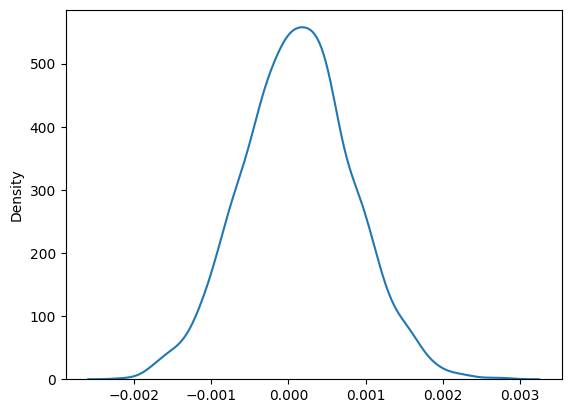

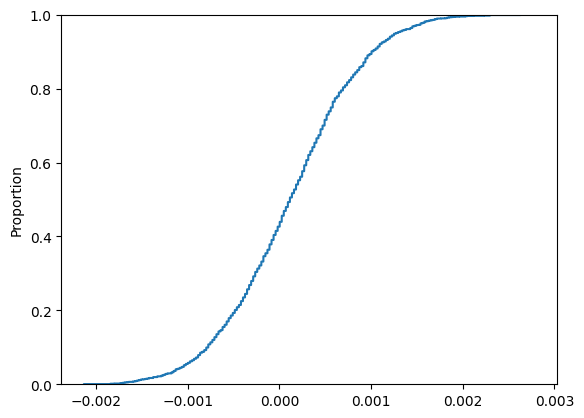

In [4]:
#Part 2
#Bootsrap densities and distributions of survival rates for the two groups

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['survive'] = 0

for i in range(len(df)):
  if df.loc[i, 'breast_cancer_death'] == 'no':
    df.loc[i,'survive'] = 1

control_df=df.loc[df['treatment']== 'control', :]
mammogram_df=df.loc[df['treatment'] == 'mammogram', :]


#Bootstrapping
S = 2000
treatment_effect_estimates= []

# Bootstrapping:
for s in range(S):
    mammogram_df_resampling = mammogram_df.sample(mammogram_df.shape[0], axis=0, replace=True) # Resample treatment
    control_df_resampling = control_df.sample(control_df.shape[0], axis=0, replace=True) # Control treatment

    mammogram_rate=np.mean(mammogram_df_resampling['survive'])
    control_rate=np.mean(control_df_resampling['survive'])
    treatment_effect_resampled=mammogram_rate - control_rate
    treatment_effect_estimates.append(treatment_effect_resampled)


#Visualization
sns.kdeplot(treatment_effect_estimates)
plt.show()

# ECDF of promotion rates:
sns.ecdfplot(treatment_effect_estimates)
plt.show()


In [11]:
#Part 3 - construct a 99% confidence interval for difference in outcomes between the two groups

lower_bound = np.quantile(treatment_effect_estimates, .005 )
upper_bound = np.quantile(treatment_effect_estimates, .995)

print('The 99% confidence interval is: (',lower_bound,', ',upper_bound,')' )

The 99% confidence interval is: ( -0.0017329325317300853 ,  0.001963028226737267 )


The confidence interval does include zero. This means that you would fail to reject the null hypothesis, which means that you cannot conclude that the mammogram has a statistically significant effect on survival outcomes over a 25 year time span.

In [ ]:
#Part 4

While it has been determined by the bootstrapping method and calculating confidence intervals that the outcomes from patients who had a mammogram did not have statistically significant differences in outcomes compared to those who did not. However, the only information that we got from the dataset was whether the patient got a mammogram or not and whether they survived or not. Breast cancer is such a complicated disease with many genetic components, so it is not possible to make a conclusion like this with such little information on the patient populations. Mammograms have been proven to reduce mortality rates in certain patient populations. Additionally, having a mammogram could have also changed treatment or the quality of life of patients. In order to make a more accurate conclusion, a much more robust dataset would be needed including much more information.

In [4]:
#QUESTION 3


file_path2 = '/content/drive/My Drive/diabetes_hw.csv'

df2 = pd.read_csv(file_path2)

print(df2.head())

   Unnamed: 0  treatment  outcome
0           1        met  success
1           2       rosi  failure
2           3       rosi  success
3           4  lifestyle  success
4           5        met  success


In [12]:
#Part 1

df2['success'] = 0
df2.loc[df2['outcome']=='success','success'] = 1

print(pd.crosstab(df2['treatment'], df2['outcome'], margins=True), '\n')
print(pd.crosstab(df2['treatment'], df2['outcome'], margins=True, normalize=True), '\n')

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 



In [15]:
#Part 2
#Proportion of successes for each treatment

lifestyle_success_rate= 125/234
print('The lifestyle success rate is: ', lifestyle_success_rate)

met_success_rate= 120 / (232)
print('The met success rate is: ', met_success_rate)

rosi_success_rate= 120 / (232)
print('The rosi success rate is: ', met_success_rate)




The lifestyle success rate is:  0.5341880341880342
The met success rate is:  0.5172413793103449
The rosi success rate is:  0.5172413793103449


The lifestyle treatment is the most successful out of the three options.


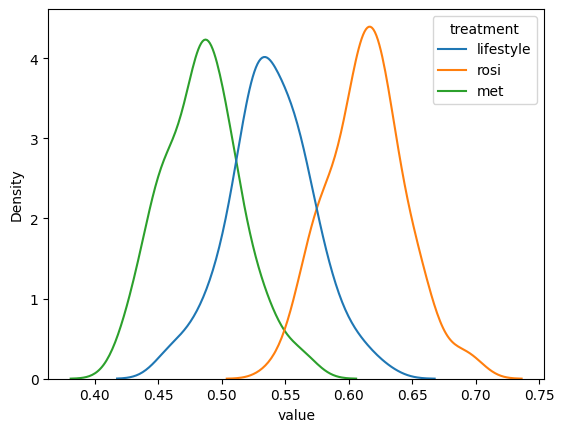

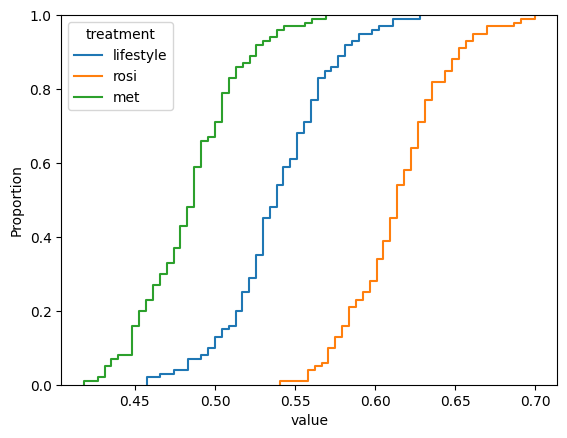

In [26]:
#Part 3
import numpy as np
import seaborn as sns
#initializing
lifestyle_df=df2.loc[df2['treatment']=='lifestyle',:]
rosi_df=df2.loc[df2['treatment']=='rosi',:]
met_df=df2.loc[df2['treatment']=='met',:]

S = 100
lifestyle_effects_estimate = []
rosi_effects_estimate = []
met_effects_estimate = []

#Bootstrapping

for i in range(S):
    lifestyle_df_resampling = lifestyle_df.sample(lifestyle_df.shape[0], axis=0, replace=True)
    rosi_df_resampling = rosi_df.sample(rosi_df.shape[0], axis=0, replace=True)
    met_df_resampling = met_df.sample(met_df.shape[0], axis=0, replace=True)

    lifestyle_effects_estimate_t = np.mean(lifestyle_df_resampling['success'])
    rosi_effects_estimate_t = np.mean(rosi_df_resampling['success'])
    met_effects_estimate_t = np.mean(met_df_resampling['success'])

    lifestyle_effects_estimate.append(lifestyle_effects_estimate_t)
    rosi_effects_estimate.append(rosi_effects_estimate_t)
    met_effects_estimate.append(met_effects_estimate_t)

combined_lifestyle=pd.DataFrame({'value':lifestyle_effects_estimate,'treatment':'lifestyle'})
combined_rosi=pd.DataFrame({'value':rosi_effects_estimate, 'treatment':'rosi'})
combined_met=pd.DataFrame({'value':met_effects_estimate,'treatment':'met'})
combined= pd.concat([combined_lifestyle, combined_rosi, combined_met])
#empirical CDF and kerney density plots grouped by treatment type
sns.kdeplot(data=combined, x='value', hue = 'treatment')
plt.show()

sns.ecdfplot(data=combined, x='value', hue = 'treatment')
plt.show()




Based on the empirical CDF and kernel density plots grouped by the three different treatment types, rosi is seen to be the most effective treatment type, lifestyle is the next best treatment type, followed by the met treatment type.

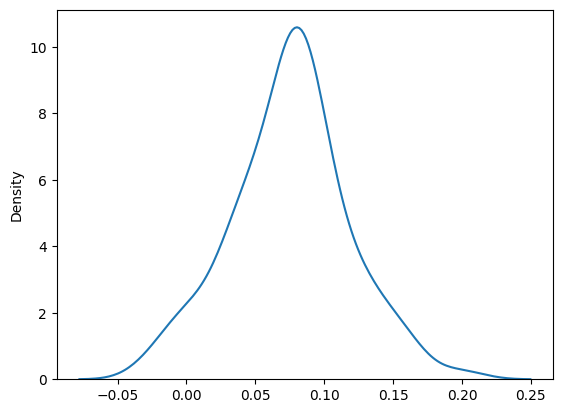

The 90% confidence interval of rosi minus lifestyle is:( 0.002359597960456384 ,  0.15236143208246208 )


In [28]:
#Part 4

#Each comparison: lifestyle vs met, met vs rosi, rosi vs lifestyle

#First comparison: rosi vs lifestyle

rosi_vs_lifestyle_comparison= np.array(rosi_effects_estimate)-np.array(lifestyle_effects_estimate)
sns.kdeplot(x=rosi_vs_lifestyle_comparison)
plt.show()
lower_bound_r_vs_l=np.quantile(rosi_vs_lifestyle_comparison, 0.05)
upper_bound_r_vs_l=np.quantile(rosi_vs_lifestyle_comparison, 0.95)
print('The 90% confidence interval of rosi minus lifestyle is:(',lower_bound_r_vs_l,', ',upper_bound_r_vs_l,')' )


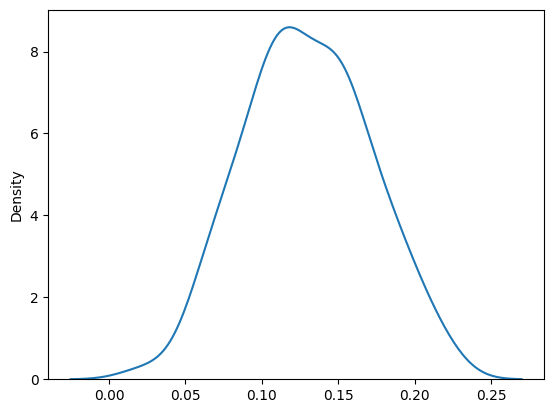

The 90% confidence interval of rosi minus lifestyle is:( 0.06645608258102707 ,  0.1956406319372503 )


In [29]:
#Second comparison rosi vs metformin

rosi_vs_met_comparison= np.array(rosi_effects_estimate)-np.array(met_effects_estimate)
sns.kdeplot(x=rosi_vs_met_comparison)
plt.show()
lower_bound_r_vs_m=np.quantile(rosi_vs_met_comparison, 0.05)
upper_bound_r_vs_m=np.quantile(rosi_vs_met_comparison, 0.95)
print('The 90% confidence interval of rosi minus lifestyle is:(',lower_bound_r_vs_m,', ',upper_bound_r_vs_m,')' )

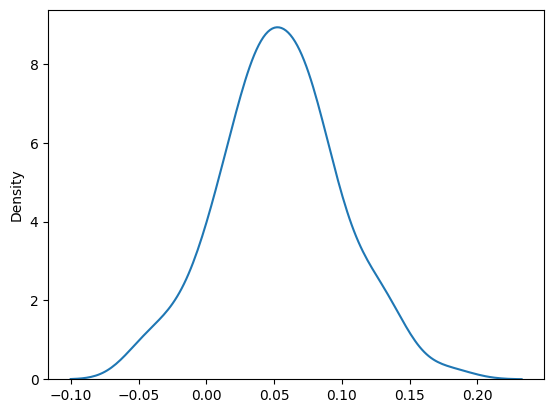

The 90% confidence interval of lifestyle minus metformin is:( -0.017637415266725645 ,  0.12865274093722365 )


In [31]:
#Lifestyle vs metformin

lifestyle_vs_met_comparison= np.array(lifestyle_effects_estimate)-np.array(met_effects_estimate)
sns.kdeplot(x=lifestyle_vs_met_comparison)
plt.show()
lower_bound_l_vs_m=np.quantile(lifestyle_vs_met_comparison, 0.05)
upper_bound_l_vs_m=np.quantile(lifestyle_vs_met_comparison, 0.95)
print('The 90% confidence interval of lifestyle minus metformin is:(',lower_bound_l_vs_m,', ',upper_bound_l_vs_m,')' )

The 90% confidence interval of lifestyle vs metformin treatments includes 0, as the interval goes from -0.0176 to 0.1286, so we can't conclude that it is statistically significant that the lifestyle treatment is better than the metformin treatment. However, for the rosi vs lifestyle, the 90% confidence does not include zero, and this is the same for rosi vs metformin. Based off of this analysis, we can conclude that rosi is a better treatment option than lifestyle and metformin.

In [ ]:
#Part 5 - Which treatment appears to be the most effective overall?


Based on the bootstrap method and statistical analysis conducted based on the data, it appears that Rosi can be a more effective treatment option compared to lifestyle and metformin. However, lifestyle changes could be the most effective options for long term treatment against diabetes. Drugs can be expensive and can have side effects, so more information is needed to determine which treatment would be effective. Additionally, there are nuances by patient, and some patients may need to make more or different lifestyle changes than others, while some patients might have a better response to or better access to drugs.